---
# 투자

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykrx import stock
from datetime import timedelta

In [3]:
# func 모음

# 1. 종목코드를 6자리로 통일. ex) 990 -> 000990
def padding(x):
    x = str(x)
    return x.rjust(6, "0")

# 2. True, False 반전
def func_not(x):
    return not x

In [ ]:
동등비중/2012/전략1/4.64/4.66/0.34/0.45
동등비중/2012/전략2/21.45/21.52/2.99/5.46 
동등비중/2012/전략3/2.71/2.72/0.32/0.46
동등비중/2012/전략4/6.41/6.43/0.82/1.17
동등비중/2012/전략5/22.22/22.28/2.26/3.46 # 최고

동등비중/2013/전략1/56.92/57.11/2.26/3.56
동등비중/2013/전략2/60.99/61.2/4.65/10.48
동등비중/2013/전략3/10.41/10.44/0.92/1.33
동등비중/2013/전략4/40.43/40.56/2.73/4.77
동등비중/2013/전략5/64.71/64.94/3.81/7.31 # 최고

동등비중/2014/전략1/52.1/52.1/1.81/2.66
동등비중/2014/전략2/43.13/43.13/3.26/6.73
동등비중/2014/전략3/15.32/15.32/1.45/2.14
동등비중/2014/전략4/29.6/29.5/2.01/3.39
동등비중/2014/전략5/47.59/47.59/2.81/4.83 # 최고

동등비중/2015/전략1/-7.42/-7.44/-0.24/-0.34
동등비중/2015/전략2/11.88/11.91/1.46/2.52 # 최고
동등비중/2015/전략3/12.9/12.94/1.15/1.77
동등비중/2015/전략4/1.38/1.39/0.18/0.27
동등비중/2015/전략5/2.41/2.41/0.28/0.43

동등비중/2016/전략1/30.85/31.24/1.42/2.21
동등비중/2016/전략2/27.43/27.77/2.14/4.14
동등비중/2016/전략3/10.93/11.05/1.27/2.21
동등비중/2016/전략4/22.38/22.66/1.49/2.5
동등비중/2016/전략5/32.84/33.26/1.99/3.24 # 최고

동등비중/2017/전략1/-0.53/-0.54/0.2/0.32
동등비중/2017/전략2/81.23/82.43/2.19/5.99
동등비중/2017/전략3/-25.4/-25.65/-1.53/-1.95
동등비중/2017/전략4/67.56/68.52/2/5.31
동등비중/2017/전략5/90.32/91.69/2.34/5.89 # 최고

동등비중/2017_전체/전략1/-11.88/-12.01/-0.33/-0.45
동등비중/2017_전체/전략2/22.64/22.92/1.64/3.35
동등비중/2017_전체/전략3/-14.8/-14.95/-1.37/-1.81
동등비중/2017_전체/전략4/22.14/22.41/1.52/2.91
동등비중/2017_전체/전략5/25.74/26.06/1.68/3.12 # 최고

동등비중/2018/전략1/18.81/25.91/0.94/1.46
동등비중/2018/전략2/32.31/45.4/2.73/6.49 # 최고
동등비중/2018/전략3/-3.17/-4.22/-0.13/-0.22
동등비중/2018/전략4/16.24/22.29/1.27/2.26
동등비중/2018/전략5/29.11/40.72/2.05/3.79

In [ ]:
벤치마크/2012/16.34/16.39/1.07/1.44
벤치마크/2013/63.42/63.64/3.11/4.96
벤치마크/2014/33.69/33.69/1.49/2.14
벤치마크/2015/24.73/24.81/1.19/1.69
벤치마크/2016/16.59/16.79/1/1.42
벤치마크/2017/-11.88/-12.01/-0.33/-0.45
벤치마크/2018/6.74/9.11/0.49/0.68


[코스피]
2013/-0.5200426855846026
2014/2.4623741202220883
2015/-1.6071384554709328
2016/9.457987302198559
2017/12.841463245844295
2018/-12.416944880858856
2019/1.355452247864661

[코스닥]
2013/-2.236583208476991
2014/18.469075544547237
2015/5.8671546991064666
2016/-10.338936425892958
2017/38.59383949595877
2018/-15.958746254897443
2019/-9.090538944911158


---
# 비중계산

## 1. 마코위츠 데이터 로드

In [5]:
df=pd.read_excel('./datasets/투자종목_2013.xlsx', index_col=0)
df["거래소코드"] = df["거래소코드"].map(padding)
df

,거래소코드
0,066130
1,064240
2,002000
3,035900
4,064800
5,003010
6,053030
7,105330
8,014190


In [1787]:
df=pd.DataFrame(df['거래소코드'].unique())
df.rename(columns={0:'거래소코드'}, inplace=True)
df

,거래소코드
0,131290
1,038680
2,017390
3,044340


## a. volinger

> # 날짜 변경(2012년도데이터면 20120401~20130331)
> 비중계산은 4월부터 3월(아래서 투자할 때는 +1년의 1월부터 +2년의 3월)

In [1788]:
n=20
sigma = 2
df_marko=[]

for i in df.index:
    df_market = stock.get_market_ohlcv("20160401", "20170331", df.loc[i,"거래소코드"])
    df_market["거래소코드"] = df.loc[i,"거래소코드"]
    df_market["center"] = df_market['종가'].rolling(n).mean()
    df_market["ub"] = df_market['center'] + sigma*df_market['종가'].rolling(n).std()
    df_market["lb"] = df_market['center'] - sigma*df_market['종가'].rolling(n).std()
    df_marko.append(df_market)

In [1789]:
df_marko = pd.concat(df_marko)
df_marko['PB'] = (df_marko['종가'] - df_marko['lb']) / (df_marko['ub'] - df_marko['lb'])
df_marko.reset_index(drop=False, inplace=True)
df_marko=df_marko.pivot(index='날짜', columns='거래소코드', values='종가')
df_marko

거래소코드,017390,038680,044340,131290
날짜,,,,
2016-04-01,82000,6970,12400,9490
2016-04-04,82300,7080,12600,9560
2016-04-05,82500,6850,12650,9970
2016-04-06,81900,6800,12800,10050
2016-04-07,83000,6820,12700,9850
...,...,...,...,...
2017-03-27,79700,6270,9800,8820
2017-03-28,79900,6150,10150,8700
2017-03-29,80500,6680,10700,8700


## 2. pct change(종목별 일별수익률)

In [1790]:
daily_ret = df_marko.pct_change()
daily_ret

거래소코드,017390,038680,044340,131290
날짜,,,,
2016-04-01,NaN,NaN,NaN,NaN
2016-04-04,0.003659,0.015782,0.016129,0.007376
2016-04-05,0.002430,-0.032486,0.003968,0.042887
2016-04-06,-0.007273,-0.007299,0.011858,0.008024
2016-04-07,0.013431,0.002941,-0.007812,-0.019900
...,...,...,...,...
2017-03-27,-0.003750,0.045000,0.003071,-0.001133
2017-03-28,0.002509,-0.019139,0.035714,-0.013605
2017-03-29,0.007509,0.086179,0.054187,0.000000


## 3. annuar_ret(일별수익률의 공분산)

In [1791]:
annual_ret = daily_ret.mean()*252 # 연간 수익률(아래 비중 계산에 사용됨)
daily_cov = daily_ret.cov()
annual_cov = daily_cov * 252
annual_cov

거래소코드,017390,038680,044340,131290
거래소코드,,,,
017390,0.027083,0.003048,0.003767,0.002222
038680,0.003048,0.131455,0.049355,0.007547
044340,0.003767,0.049355,0.126545,0.023051
131290,0.002222,0.007547,0.023051,0.196855


In [1792]:
list_stocks=annual_cov.columns.tolist()
port_ret = []
port_risk = []
port_weights = []
sharpe_ratio = [] 

## 4. 몬테까를로 시뮬레이션 20000개 시나리오 

In [1793]:
#몬테까를로 시뮬레이션 20000개 시나리오 
for _ in range(20000): 
    weights = np.random.random(len(list_stocks))  # 랜덤숫자 4개
    weights /= np.sum(weights)  # 4개의 랜덤 숫자를 랜덤 숫자의 총합으로 나눠서, 4 종목 비중의 합이 1

    returns = np.dot(weights, annual_ret) # 비중 * 연간 수익율 --> 포트 수익률
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))  # 종목별 연간 공분산과 종목별 비중 배열 곱하고, 이를 다시 종목 별 비중 전치로 곱함. 이걸 제곱근. 

    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(weights)
    sharpe_ratio.append(returns/risk) 

portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharpe': sharpe_ratio}
for i, s in enumerate(list_stocks): 
    portfolio[s] = [weight[i] for weight in port_weights] 
df = pd.DataFrame(portfolio) 
df = df[['Returns', 'Risk', 'Sharpe'] + [s for s in list_stocks]]  

In [1794]:
df

,Returns,Risk,Sharpe,017390,038680,044340,131290
0,-0.012862,0.226443,-0.056800,0.256280,0.345667,0.387515,0.010538
1,-0.016776,0.235758,-0.071158,0.165111,0.095662,0.441027,0.298200
2,-0.003700,0.278074,-0.013306,0.014960,0.546314,0.348862,0.089865
3,-0.022224,0.282617,-0.078636,0.055347,0.378660,0.558392,0.007601
4,-0.011773,0.226410,-0.052000,0.212375,0.089335,0.365814,0.332477
...,...,...,...,...,...,...,...
19995,0.002393,0.238182,0.010046,0.133565,0.477139,0.237168,0.152128
19996,-0.008886,0.214284,-0.041469,0.216570,0.297163,0.344095,0.142172
19997,0.004304,0.203662,0.021131,0.344821,0.153448,0.135363,0.366367
19998,-0.016516,0.228742,-0.072205,0.165001,0.195355,0.445258,0.194386


In [1795]:
# 리스크가 같을 때 수익률을 높게 : 아래 별모양
max_sharpe = df.loc[df['Sharpe'] == df['Sharpe'].max()]
max_sharpe

,Returns,Risk,Sharpe,017390,038680,044340,131290
18875,0.02101,0.244022,0.086098,0.167846,0.558699,0.001076,0.272379


In [1796]:
list_code = list(max_sharpe.columns)
list_percen = list(max_sharpe.iloc[0])
dict_weight_max = dict(zip(list_code, list_percen))
print(dict_weight_max)

{'Returns': 0.02100983738190559, 'Risk': 0.24402227440368673, 'Sharpe': 0.08609803114591481, '017390': 0.16784601092812676, '038680': 0.558699052878133, '044340': 0.00107557062185895, '131290': 0.27237936557188125}


In [1797]:
# 수익률이 같을 때 리스크를 낮게 : 아래 x모양
min_risk = df.loc[df['Risk'] == df['Risk'].min()] 
min_risk

,Returns,Risk,Sharpe,017390,038680,044340,131290
14223,0.000762,0.143542,0.005311,0.714178,0.109814,0.08278,0.093228


In [1798]:
list_code = list(min_risk.columns)
list_percen = list(min_risk.iloc[0])
dict_weight_min = dict(zip(list_code, list_percen))
print(dict_weight_min)

{'Returns': 0.0007624086567133339, 'Risk': 0.14354199439378257, 'Sharpe': 0.005311397963593831, '017390': 0.7141780012286052, '038680': 0.10981391412194536, '044340': 0.08278011773996222, '131290': 0.09322796690948719}


## 5. 몬테까를로 시각화

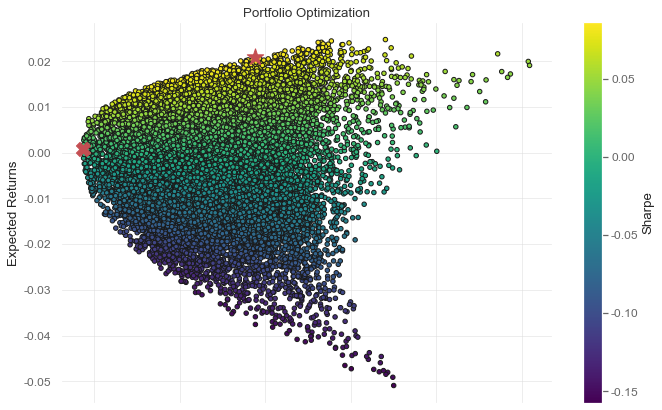

In [1799]:
df.plot.scatter(x='Risk', y='Returns', c='Sharpe', cmap='viridis', edgecolors='k', figsize=(11,7), grid=True)  
plt.scatter(x=max_sharpe['Risk'], y=max_sharpe['Returns'], c='r', marker='*', s=300) 
plt.scatter(x=min_risk['Risk'], y=min_risk['Returns'], c='r', marker='X', s=200)  
plt.title('Portfolio Optimization') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show()

---
# 전략

## 1. 볼린저밴드와 MFI를 활용한 추세 추종 매매

추세 추종 : 상승 추세에 매수, 하락 추세에 매도
현금흐름지표 MFI나 일중강도 같은 거래량 관련 지표를 함께 활용

매수 : 주가 상단 밴드에 접근하며, 지표가 강세를 확증할 때만 매수 (%b가 0.8보다 크고, MFI가 80보다 클 때)
매도 : 주가 하단 밴드에 접근하며, 지표가 약세를 확증할 때만 매도 (%b가 0.2보다 작고, MFI가 20보다 작을 때)

%b : 주가가 볼린저 밴드 어디에 위치하는지 
     (종가 - 하단 볼린저 밴드) / (상단 볼린저 밴드 - 하단 볼린저 밴드)

MFI : 중심가격 TP (고가, 저가, 종가 합을 3으로 나눔) 
     TP * 거래량 = 현금흐름  --> 이것을 중심가격이 전일 대비 상승한 날은 '긍정적 현금흐름 합'
                                                   하락한 날은 '부정적 현금흐름 합'



## 2. 볼린저 밴드와 일중 강도를 활용한 반전 매매

### a.볼린저밴드

- 주가가 반점하는 지점을 찾아서 매수 또는 매도
- 매수 : 주가가 하단 밴드 부근에서 W(쌍바닥) 패턴을 나타내고, 강세 지표가 확증 할 때 매수 (%b가 0.05보다 작고, II% 가 0보다 크면 매수)
- 매도 : 주가가 상단 밴드 부근에서 주가 태그, 약세 지표가 확증 할 때 매수 (%b가 0.95보다 크고, II% 가 0보다 작으면 매수)

---
# Preprocessing 

## 0. Data

In [1814]:
df_2012=pd.read_excel('./datasets/투자종목_2016.xlsx', index_col=0)
df_2012["거래소코드"] = df_2012["거래소코드"].map(padding)
# df_2012 = df_2012[df_2012["회계년도"]==2018]
# df_2012 = df_2012[["거래소코드"]]
df_2012

,거래소코드
0,131290
1,038680
2,017390
3,044340


In [1815]:
df_2012=pd.DataFrame(df_2012['거래소코드'].unique())
df_2012.rename(columns={0:'거래소코드'}, inplace=True)
df_2012

,거래소코드
0,131290
1,038680
2,017390
3,044340


## 1. volinger

> # 날짜 변경(2012년도데이터면 20130101~20140331)

In [1816]:
n=20
sigma = 2
df_invest=[]

for i in df_2012.index:
    df_market = stock.get_market_ohlcv("20170101", "20180331", df_2012.loc[i,"거래소코드"]) # 연도마다 날짜 설정
    df_market["거래소코드"] = df_2012.loc[i,"거래소코드"]
    df_market["center"] = df_market['종가'].rolling(n).mean()
    df_market["ub"] = df_market['center'] + sigma*df_market['종가'].rolling(n).std()
    df_market["lb"] = df_market['center'] - sigma*df_market['종가'].rolling(n).std()
    df_invest.append(df_market)

In [1817]:
df_invest = pd.concat(df_invest)
df_invest['PB'] = (df_invest['종가'] - df_invest['lb']) / (df_invest['ub'] - df_invest['lb'])
df_invest['PB'] = df_invest['PB'].fillna(0.5) # 상한선 하한선이 같아서 PB(바닥부터의 위치)를 중간인 0.5로 설정
df_invest

,시가,고가,저가,종가,거래량,거래대금,등락률,거래소코드,center,ub,lb,PB
날짜,,,,,,,,,,,,
2017-01-02,8180,8180,7940,8090,7527,60629400,1.130000,131290,NaN,NaN,NaN,0.500000
2017-01-03,8020,8290,7950,8270,10005,81208310,2.220000,131290,NaN,NaN,NaN,0.500000
2017-01-04,8270,8330,8190,8270,7152,59052840,0.000000,131290,NaN,NaN,NaN,0.500000
2017-01-05,8330,8350,8240,8320,3230,26696670,0.600000,131290,NaN,NaN,NaN,0.500000
2017-01-06,8390,10800,8270,10800,804812,8439149930,29.809999,131290,NaN,NaN,NaN,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-26,20500,21800,19400,19700,3002851,61787630250,1.550000,044340,18637.5,20629.556594,16645.443406,0.766684
2018-03-27,20000,20200,19400,19800,761862,15114602300,0.510000,044340,18780.0,20668.859305,16891.140695,0.770004
2018-03-28,19550,20400,19500,19900,600300,11972866950,0.510000,044340,18927.5,20669.693113,17185.306887,0.779102


## 2. MFI (Money Flow Index)

In [1818]:
df_invest.rename(columns={'고가':'high'},inplace = True)
df_invest.rename(columns={'저가':'low'},inplace = True)
df_invest.rename(columns={'종가':'close'},inplace = True)
df_invest.rename(columns={'거래량':'volume'},inplace = True)

In [1819]:
df_invest['TP'] = (df_invest['high'] + df_invest['low'] + df_invest['close']) / 3
df_invest["PMF"] = 0
df_invest["NMF"] = 0

In [1820]:
for i in range(len(df_invest.close)-1):
    if df_invest.TP.values[i] < df_invest.TP.values[i+1]:
        df_invest.PMF.values[i+1] = df_invest.TP.values[i+1] * df_invest.volume.values[i+1]
        df_invest.NMF.values[i+1] = 0
    else:
        df_invest.NMF.values[i+1] = df_invest.TP.values[i+1] * df_invest.volume.values[i+1]
        df_invest.PMF.values[i+1] = 0

In [1821]:
df_invest['MFR'] = (df_invest.PMF.rolling(window=10).sum() / df_invest.NMF.rolling(window=10).sum())
df_invest['MFR'] = df_invest['MFR'].fillna(0) # PMF, NMF가 0이면 NaN임(거래정지일 때)
df_invest['MFI10'] = 100 - 100/(1 + df_invest['MFR'])
df_invest.head(10)

,시가,high,low,close,volume,거래대금,등락률,거래소코드,center,ub,lb,PB,TP,PMF,NMF,MFR,MFI10
날짜,,,,,,,,,,,,,,,,,
2017-01-02,8180,8180,7940,8090,7527,60629400,1.130000,131290,NaN,NaN,NaN,0.5,8070.000000,0,0,0.000000,0.000000
2017-01-03,8020,8290,7950,8270,10005,81208310,2.220000,131290,NaN,NaN,NaN,0.5,8170.000000,81740850,0,0.000000,0.000000
2017-01-04,8270,8330,8190,8270,7152,59052840,0.000000,131290,NaN,NaN,NaN,0.5,8263.333333,59099360,0,0.000000,0.000000
2017-01-05,8330,8350,8240,8320,3230,26696670,0.600000,131290,NaN,NaN,NaN,0.5,8303.333333,26819766,0,0.000000,0.000000
2017-01-06,8390,10800,8270,10800,804812,8439149930,29.809999,131290,NaN,NaN,NaN,0.5,9956.666667,8013244813,0,0.000000,0.000000
2017-01-09,10800,10900,10400,10900,431968,4597185150,0.930000,131290,NaN,NaN,NaN,0.5,10733.333333,4636456533,0,0.000000,0.000000
2017-01-10,10800,10950,10550,10950,210785,2263718050,0.460000,131290,NaN,NaN,NaN,0.5,10816.666667,2279991083,0,0.000000,0.000000
2017-01-11,10750,11000,10600,11000,157940,1711372450,0.460000,131290,NaN,NaN,NaN,0.5,10866.666667,1716281333,0,0.000000,0.000000
2017-01-12,11050,11100,10550,10750,107385,1157094250,-2.270000,131290,NaN,NaN,NaN,0.5,10800.000000,0,1159758000,0.000000,0.000000


## 3. 일중 강도

In [1822]:
df_invest['II'] = (2*df_invest['close']-df_invest['high']-df_invest['low'])/(df_invest['high']-df_invest['low'])*df_invest['volume']
df_invest['II'] = df_invest['II'].fillna(0) # 상한가 또는 하한가일 때 가격이 고정되어서 분모, 분자가 0이된다.
df_invest['IIP21'] = df_invest['II'].rolling(window=21).sum()/df_invest['volume'].rolling(window=21).sum()*100
# df_invest = df_invest.dropna()
df_invest.head(20)

,시가,high,low,close,volume,거래대금,등락률,거래소코드,center,ub,lb,PB,TP,PMF,NMF,MFR,MFI10,II,IIP21
날짜,,,,,,,,,,,,,,,,,,,
2017-01-02,8180,8180,7940,8090,7527,60629400,1.130000,131290,NaN,NaN,NaN,0.500000,8070.000000,0,0,0.000000,0.000000,1881.750000,NaN
2017-01-03,8020,8290,7950,8270,10005,81208310,2.220000,131290,NaN,NaN,NaN,0.500000,8170.000000,81740850,0,0.000000,0.000000,8827.941176,NaN
2017-01-04,8270,8330,8190,8270,7152,59052840,0.000000,131290,NaN,NaN,NaN,0.500000,8263.333333,59099360,0,0.000000,0.000000,1021.714286,NaN
2017-01-05,8330,8350,8240,8320,3230,26696670,0.600000,131290,NaN,NaN,NaN,0.500000,8303.333333,26819766,0,0.000000,0.000000,1468.181818,NaN
2017-01-06,8390,10800,8270,10800,804812,8439149930,29.809999,131290,NaN,NaN,NaN,0.500000,9956.666667,8013244813,0,0.000000,0.000000,804812.000000,NaN
2017-01-09,10800,10900,10400,10900,431968,4597185150,0.930000,131290,NaN,NaN,NaN,0.500000,10733.333333,4636456533,0,0.000000,0.000000,431968.000000,NaN
2017-01-10,10800,10950,10550,10950,210785,2263718050,0.460000,131290,NaN,NaN,NaN,0.500000,10816.666667,2279991083,0,0.000000,0.000000,210785.000000,NaN
2017-01-11,10750,11000,10600,11000,157940,1711372450,0.460000,131290,NaN,NaN,NaN,0.500000,10866.666667,1716281333,0,0.000000,0.000000,157940.000000,NaN
2017-01-12,11050,11100,10550,10750,107385,1157094250,-2.270000,131290,NaN,NaN,NaN,0.500000,10800.000000,0,1159758000,0.000000,0.000000,-29286.818182,NaN


In [1823]:
# PB가 0.05 이하면서, IIP21이 0 이상이면 매수
# PB가 0.95 이하면서, IIP21이 0 이하이면 매수

# for i in range(0, len(df.close)):
#     if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
#     elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:

## 4. MACD

In [1824]:
macd_short, macd_long, macd_signal=12,26,9
df_invest["MACD_short"]=df_invest["close"].rolling(macd_short).mean()
df_invest["MACD_long"]=df_invest["close"].rolling(macd_long).mean()
df_invest["MACD"]=df_invest.apply(lambda x: (x["MACD_short"]-x["MACD_long"]), axis=1)
df_invest["MACD_signal"]=df_invest["MACD"].rolling(macd_signal).mean()  
# df_invest["MACD_sign"]=df_invest.apply(lambda x: ("매수" if x["MACD"]>x["MACD_signal"] else "매도"), axis=1)
df_invest.head(10)

,시가,high,low,close,volume,거래대금,등락률,거래소코드,center,ub,...,PMF,NMF,MFR,MFI10,II,IIP21,MACD_short,MACD_long,MACD,MACD_signal
날짜,,,,,,,,,,,,,,,,,,,,,
2017-01-02,8180,8180,7940,8090,7527,60629400,1.130000,131290,NaN,NaN,...,0,0,0.000000,0.000000,1881.750000,NaN,NaN,NaN,NaN,NaN
2017-01-03,8020,8290,7950,8270,10005,81208310,2.220000,131290,NaN,NaN,...,81740850,0,0.000000,0.000000,8827.941176,NaN,NaN,NaN,NaN,NaN
2017-01-04,8270,8330,8190,8270,7152,59052840,0.000000,131290,NaN,NaN,...,59099360,0,0.000000,0.000000,1021.714286,NaN,NaN,NaN,NaN,NaN
2017-01-05,8330,8350,8240,8320,3230,26696670,0.600000,131290,NaN,NaN,...,26819766,0,0.000000,0.000000,1468.181818,NaN,NaN,NaN,NaN,NaN
2017-01-06,8390,10800,8270,10800,804812,8439149930,29.809999,131290,NaN,NaN,...,8013244813,0,0.000000,0.000000,804812.000000,NaN,NaN,NaN,NaN,NaN
2017-01-09,10800,10900,10400,10900,431968,4597185150,0.930000,131290,NaN,NaN,...,4636456533,0,0.000000,0.000000,431968.000000,NaN,NaN,NaN,NaN,NaN
2017-01-10,10800,10950,10550,10950,210785,2263718050,0.460000,131290,NaN,NaN,...,2279991083,0,0.000000,0.000000,210785.000000,NaN,NaN,NaN,NaN,NaN
2017-01-11,10750,11000,10600,11000,157940,1711372450,0.460000,131290,NaN,NaN,...,1716281333,0,0.000000,0.000000,157940.000000,NaN,NaN,NaN,NaN,NaN
2017-01-12,11050,11100,10550,10750,107385,1157094250,-2.270000,131290,NaN,NaN,...,0,1159758000,0.000000,0.000000,-29286.818182,NaN,NaN,NaN,NaN,NaN


## 5. 이평선

In [1825]:
df_invest['MA9'] = df_invest['close'].rolling(9).mean()
df_invest['MA20'] = df_invest['close'].rolling(20).mean()
df_invest['MA40'] = df_invest['close'].rolling(40).mean()
df_invest['MA60'] = df_invest['close'].rolling(60).mean()

# pd.set_option('display.max_columns', None)
# df_invest.drop(columns='MACD_signal', inplace=True)
df_invest.reset_index(drop=False, inplace=True)
df_invest

,날짜,시가,high,low,close,volume,거래대금,등락률,거래소코드,center,...,II,IIP21,MACD_short,MACD_long,MACD,MACD_signal,MA9,MA20,MA40,MA60
0,2017-01-02,8180,8180,7940,8090,7527,60629400,1.130000,131290,NaN,...,1.881750e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-03,8020,8290,7950,8270,10005,81208310,2.220000,131290,NaN,...,8.827941e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-04,8270,8330,8190,8270,7152,59052840,0.000000,131290,NaN,...,1.021714e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-05,8330,8350,8240,8320,3230,26696670,0.600000,131290,NaN,...,1.468182e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-06,8390,10800,8270,10800,804812,8439149930,29.809999,131290,NaN,...,8.048120e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,2018-03-26,20500,21800,19400,19700,3002851,61787630250,1.550000,044340,18637.5,...,-2.252138e+06,-30.129345,19320.833333,18276.923077,1043.910256,900.890313,19250.000000,18637.5,17853.75,17054.166667
1212,2018-03-27,20000,20200,19400,19800,761862,15114602300,0.510000,044340,18780.0,...,0.000000e+00,-28.499652,19379.166667,18384.615385,994.551282,939.458689,19294.444444,18780.0,17937.50,17180.000000
1213,2018-03-28,19550,20400,19500,19900,600300,11972866950,0.510000,044340,18927.5,...,-6.670000e+04,-28.037307,19412.500000,18498.076923,914.423077,952.742165,19300.000000,18927.5,18007.50,17301.666667
1214,2018-03-29,20450,20450,19650,20000,516784,10336972100,0.500000,044340,19040.0,...,-6.459800e+04,-27.968702,19412.500000,18615.384615,797.115385,943.696581,19388.888889,19040.0,18090.00,17405.833333


## 6. 마지막
> # 사용하는 날짜만 필터링(04/01~03/31)

In [1827]:
df_2012 = df_invest[df_invest['날짜'] >= '2017-04-01']
df_2012.set_index('날짜', inplace=True)
df_2012

,시가,high,low,close,volume,거래대금,등락률,거래소코드,center,ub,...,II,IIP21,MACD_short,MACD_long,MACD,MACD_signal,MA9,MA20,MA40,MA60
날짜,,,,,,,,,,,,,,,,,,,,,
2017-04-03,8950,8950,8750,8870,4702,41355250,0.00,131290,8922.0,9172.523662,...,9.404000e+02,4.282666,8897.500000,8928.461538,-30.961538,-40.705128,8848.888889,8922.0,9172.50,9465.000000
2017-04-04,8870,8990,8740,8920,4434,38922890,0.56,131290,8923.5,9173.575778,...,1.950960e+03,3.584790,8880.833333,8937.307692,-56.474359,-37.307692,8840.000000,8923.5,9148.00,9475.000000
2017-04-05,8920,9010,8820,8910,13751,122114310,-0.11,131290,8912.5,9142.911531,...,-7.237368e+02,-2.446343,8869.166667,8924.615385,-55.448718,-37.827635,8833.333333,8912.5,9117.00,9443.500000
2017-04-06,8900,8910,8710,8870,5098,44609180,-0.45,131290,8913.5,9142.940968,...,3.058800e+03,-1.118649,8861.666667,8912.307692,-50.641026,-37.428775,8837.777778,8913.5,9082.50,9409.666667
2017-04-07,8870,9700,8800,9100,39861,367358970,2.59,131290,8921.0,9164.820469,...,-1.328700e+04,-3.288465,8870.000000,8916.538462,-46.538462,-37.663818,8868.888889,8921.0,9057.50,9378.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-26,20500,21800,19400,19700,3002851,61787630250,1.55,044340,18637.5,20629.556594,...,-2.252138e+06,-30.129345,19320.833333,18276.923077,1043.910256,900.890313,19250.000000,18637.5,17853.75,17054.166667
2018-03-27,20000,20200,19400,19800,761862,15114602300,0.51,044340,18780.0,20668.859305,...,0.000000e+00,-28.499652,19379.166667,18384.615385,994.551282,939.458689,19294.444444,18780.0,17937.50,17180.000000
2018-03-28,19550,20400,19500,19900,600300,11972866950,0.51,044340,18927.5,20669.693113,...,-6.670000e+04,-28.037307,19412.500000,18498.076923,914.423077,952.742165,19300.000000,18927.5,18007.50,17301.666667


In [1828]:
# df_2012[df_2012.isna().any(axis=1)]
df_2012.isna().sum()

시가             0
high           0
low            0
close          0
volume         0
거래대금           0
등락률            0
거래소코드          0
center         0
ub             0
lb             0
PB             0
TP             0
PMF            0
NMF            0
MFR            0
MFI10          0
II             0
IIP21          0
MACD_short     0
MACD_long      0
MACD           0
MACD_signal    0
MA9            0
MA20           0
MA40           0
MA60           0
dtype: int64

---
# 전략1 : Buy&Hold 전략

## 2) 포트폴리오 일별 수익률 계산(비중 3개 중 택 1)

In [1829]:
df_port = df_2012.copy()
df_port

,시가,high,low,close,volume,거래대금,등락률,거래소코드,center,ub,...,II,IIP21,MACD_short,MACD_long,MACD,MACD_signal,MA9,MA20,MA40,MA60
날짜,,,,,,,,,,,,,,,,,,,,,
2017-04-03,8950,8950,8750,8870,4702,41355250,0.00,131290,8922.0,9172.523662,...,9.404000e+02,4.282666,8897.500000,8928.461538,-30.961538,-40.705128,8848.888889,8922.0,9172.50,9465.000000
2017-04-04,8870,8990,8740,8920,4434,38922890,0.56,131290,8923.5,9173.575778,...,1.950960e+03,3.584790,8880.833333,8937.307692,-56.474359,-37.307692,8840.000000,8923.5,9148.00,9475.000000
2017-04-05,8920,9010,8820,8910,13751,122114310,-0.11,131290,8912.5,9142.911531,...,-7.237368e+02,-2.446343,8869.166667,8924.615385,-55.448718,-37.827635,8833.333333,8912.5,9117.00,9443.500000
2017-04-06,8900,8910,8710,8870,5098,44609180,-0.45,131290,8913.5,9142.940968,...,3.058800e+03,-1.118649,8861.666667,8912.307692,-50.641026,-37.428775,8837.777778,8913.5,9082.50,9409.666667
2017-04-07,8870,9700,8800,9100,39861,367358970,2.59,131290,8921.0,9164.820469,...,-1.328700e+04,-3.288465,8870.000000,8916.538462,-46.538462,-37.663818,8868.888889,8921.0,9057.50,9378.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-26,20500,21800,19400,19700,3002851,61787630250,1.55,044340,18637.5,20629.556594,...,-2.252138e+06,-30.129345,19320.833333,18276.923077,1043.910256,900.890313,19250.000000,18637.5,17853.75,17054.166667
2018-03-27,20000,20200,19400,19800,761862,15114602300,0.51,044340,18780.0,20668.859305,...,0.000000e+00,-28.499652,19379.166667,18384.615385,994.551282,939.458689,19294.444444,18780.0,17937.50,17180.000000
2018-03-28,19550,20400,19500,19900,600300,11972866950,0.51,044340,18927.5,20669.693113,...,-6.670000e+04,-28.037307,19412.500000,18498.076923,914.423077,952.742165,19300.000000,18927.5,18007.50,17301.666667


### 1. 동등비중

In [1830]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = df_acompany["close"].pct_change() # 전략없이 일평균으로만
#     port_return += df_stock
# port_return = port_return/len(list_company_code)

### 2. 수익률 높게

In [1831]:
list_company_code = list(df_port["거래소코드"].unique())

port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
for i in list_company_code:
    df_acompany = df_port[df_port["거래소코드"]==i]
    df_stock = df_acompany["close"].pct_change()
    port_return += df_stock * dict_weight_max[i] # 리스크가 같을 때 수익률 젤 높게하는 비중으로 가중평균
port_return = port_return/len(list_company_code)

### 3. 리스크 낮게

In [1832]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = df_acompany["close"].pct_change()
#     port_return += df_stock * dict_weight_min[i] # 수익률이 같을 때 리스크를 낮게하는 비중으로 가중평균
# port_return = port_return/len(list_company_code)

## 3) 포트폴리오 평가

                    Strategy
------------------  ----------
Start Period        2017-04-03
End Period          2018-03-30
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   2.85%
CAGR﹪              2.88%

Sharpe              0.53
Prob. Sharpe Ratio  69.77%
Sortino             0.78
Sortino/√2          0.55
Omega               1.09

Max Drawdown        -2.81%
Longest DD Days     89

Gain/Pain Ratio     0.09
Gain/Pain (1M)      0.69

Payoff Ratio        1.0
Profit Factor       1.09
Common Sense Ratio  1.17
CPC Index           0.57
Tail Ratio          1.07
Outlier Win Ratio   3.69
Outlier Loss Ratio  3.03

MTD                 -0.18%
3M                  0.14%
6M                  1.95%
YTD                 0.14%
1Y                  2.85%
3Y (ann.)           2.88%
5Y (ann.)           2.88%
10Y (ann.)          2.88%
All-time (ann.)     2.88%

Avg. Drawdown       -1.25%
Avg. Drawdown Days  30
Recovery Factor     1.01
Ulcer Index         0.01
Serenity Index      0.34


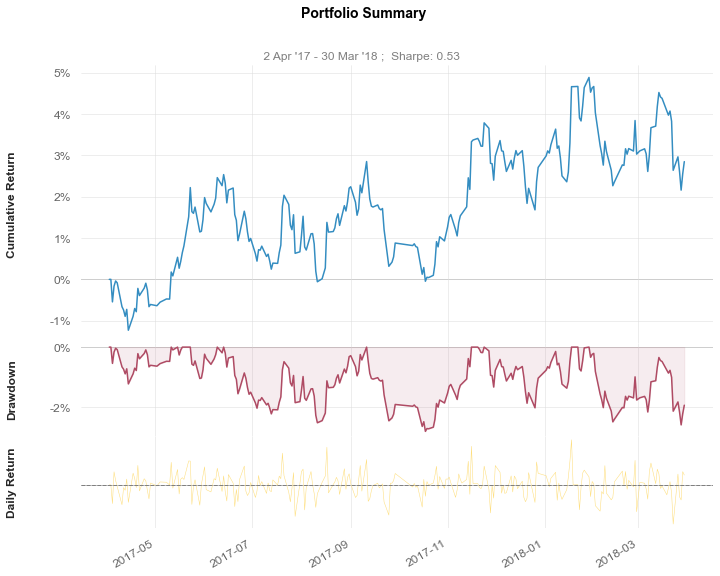

In [1833]:
import quantstats as qs
qs.reports.metrics(port_return, mode = 'basic')
qs.plots.snapshot(port_return)

---
# 전략2 : PB&MFI 전략

## 1) 전략2 함수 : 일별수익률로 return

In [1834]:
def func_strategy2(df_func):
    
    # 1.컬럼 생성
    df_func["BS"] = ""
    df_func["보유날_종가"] = 0
    df_func["보유날_일별수익률"] = 0
    df_func["첫매수날_여부"] = 0 # 첫매수날의 일별수익율은 0이다. 일별수익률 컬럼만들어준 뒤 이거 사용해서 다시 전처리
    df_func
    
    # 2. BS 컬럼
    ## BS컬럼 생성을 위해 임의의 2개 행 만들기
    df_tm2 = pd.DataFrame(df_func.iloc[0]).T
    df_tm2["날짜"]=(df_func.index[0] - timedelta(days=2))
    df_tm2["BS"] = "sell" 
    df_tm2.set_index("날짜", inplace=True)
    df_tm2

    df_tm1 = pd.DataFrame(df_func.iloc[0]).T
    df_tm1["날짜"]=(df_func.index[0] - timedelta(days=1))
    df_tm1["BS"] = "sell"
    df_tm1.set_index("날짜", inplace=True)
    df_tm1

    df_func = pd.concat([df_tm2, df_tm1, df_func], axis=0)
    df_func.reset_index(drop=False, inplace=True)
    df_func
    
    ## BS컬럼에 buy&sell 넣기
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
    
        if df_func.loc[i-1, "BS"] == "sell": # (전날에 sell이면) buy조건 만족하는지 확인
            if (df_func.loc[i-2, "BS"] == "buy")&(df_func.loc[i-1, "BS"] == "sell")&((df_func.loc[i, "PB"] >= 0.7)&(df_func.loc[i, "MFI10"] >= 70)):
                df_func.loc[i-1, "BS"] = "buy"
                df_func.loc[i, "첫매수날_여부"] = 1
            
            if (df_func.loc[i, "PB"] >= 0.7)&(df_func.loc[i, "MFI10"] >= 70):
                df_func.loc[i, "BS"] = "buy"
            else:
                df_func.loc[i, "BS"] = "sell"
        
        else: # (전날이 "buy"일 때) sell조건
            if (df_func.loc[i, "PB"] <= 0.6): # 매도사인
                df_func.loc[i, "BS"] = "sell"
            else:
                df_func.loc[i, "BS"] = "buy" # sell조건 만족 안하면 "buy"
    
    # 3. "보유날_종가"
    for i in df_func.index:
        if df_func.loc[i, "BS"] == "buy":
            df_func.loc[i, "보유날_종가"] = df_func.loc[i, "close"]
    
    # 4. "보유날_일별수익률" 컬럼
    df_func["보유날_일별수익률"] = df_func["보유날_종가"].pct_change()
    df_func["보유날_일별수익률"] = df_func["보유날_일별수익률"].fillna(0)
    for i in df_func.index:
        if df_func.loc[i, "보유날_일별수익률"] == -1.0:
            df_func.loc[i, "보유날_일별수익률"] = 0
        if df_func.loc[i, "보유날_일별수익률"] == np.inf:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    # 5. "첫매수날_여부" 컬럼
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
        
        if (df_func.loc[i-1, "BS"] == "sell")&(df_func.loc[i, "BS"] == "buy"):
            df_func.loc[i, "첫매수날_여부"] = 1
    
    for i in df_func.index:
        if df_func.loc[i, "첫매수날_여부"] == 1:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    df_func.drop(index=[0,1],inplace=True)
    df_func.reset_index(drop=True, inplace=True)
    df_stock = df_func.set_index("날짜")["보유날_일별수익률"]
    
    return df_stock

## 2) 포트폴리오 일별 수익률 계산

In [1835]:
df_port = df_2012.copy()

### 1. 동등비중

In [1836]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = func_strategy2(df_acompany)
#     port_return += df_stock
# port_return = port_return/len(list_company_code)

### 2. 수익률 높게

In [1837]:
list_company_code = list(df_port["거래소코드"].unique())

port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
for i in list_company_code:
    df_acompany = df_port[df_port["거래소코드"]==i]
    df_stock = func_strategy2(df_acompany)
    port_return += df_stock * dict_weight_max[i]
port_return = port_return/len(list_company_code)

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/2890457025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_func["BS"] = ""
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/2890457025.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_func["보유날_종가"] = 0
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/2890457025.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

### 3. 리스크 낮게

In [1838]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = func_strategy2(df_acompany)
#     port_return += df_stock * dict_weight_min[i] # 수익률이 같을 때 리스크를 낮게하는 비중으로 가중평균
# port_return = port_return/len(list_company_code)

## 3) 포트폴리오 평가

                    Strategy
------------------  ----------
Start Period        2017-04-03
End Period          2018-03-30
Risk-Free Rate      0.0%
Time in Market      70.0%

Cumulative Return   4.71%
CAGR﹪              4.77%

Sharpe              1.65
Prob. Sharpe Ratio  95.67%
Sortino             2.89
Sortino/√2          2.05
Omega               1.47

Max Drawdown        -1.18%
Longest DD Days     101

Gain/Pain Ratio     0.47
Gain/Pain (1M)      4.57

Payoff Ratio        1.14
Profit Factor       1.47
Common Sense Ratio  1.84
CPC Index           0.94
Tail Ratio          1.26
Outlier Win Ratio   7.61
Outlier Loss Ratio  3.13

MTD                 -0.5%
3M                  -0.77%
6M                  0.8%
YTD                 -0.77%
1Y                  4.71%
3Y (ann.)           4.77%
5Y (ann.)           4.77%
10Y (ann.)          4.77%
All-time (ann.)     4.77%

Avg. Drawdown       -0.39%
Avg. Drawdown Days  21
Recovery Factor     4.0
Ulcer Index         0.0
Serenity Index      2.55


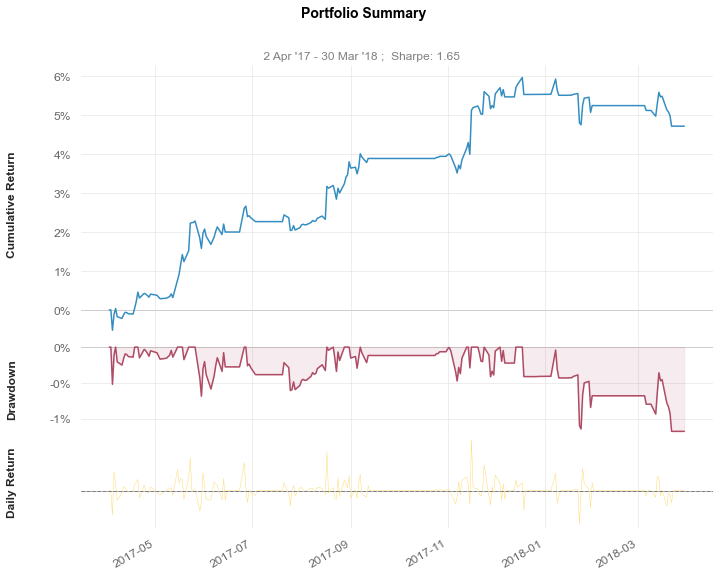

In [1839]:
import quantstats as qs
qs.reports.metrics(port_return, mode = 'basic')
qs.plots.snapshot(port_return)

## 함수 만들기(안씀)

In [1513]:
# df_test = df_PB[df_PB["거래소코드"]=="023430"]
# df_test["BS"] = ""
# df_test["보유날_종가"] = 0
# df_test["보유날_일별수익률"] = 0
# df_test["첫매수날_여부"] = 0 # 첫매수날의 일별수익율은 0이다. 일별수익률 컬럼만들어준 뒤 이거 사용해서 다시 전처리
# df_test

In [1514]:
# from datetime import timedelta 
# df_tm2 = pd.DataFrame(df_test.iloc[0]).T
# df_tm2["날짜"]=(df_test.index[0] - timedelta(days=2))
# df_tm2["BS"] = "sell" 
# df_tm2.set_index("날짜", inplace=True)
# df_tm2

# df_tm1 = pd.DataFrame(df_test.iloc[0]).T
# df_tm1["날짜"]=(df_test.index[0] - timedelta(days=1))
# df_tm1["BS"] = "sell"
# df_tm1.set_index("날짜", inplace=True)
# df_tm1

# df_test = pd.concat([df_tm2, df_tm1, df_test], axis=0)
# df_test.reset_index(drop=False, inplace=True)
# df_test

1. BS 컬럼

In [1515]:
# for i in df_test.index:
#     if (i == df_test.index[0])|(i == df_test.index[1]):
#         continue
    
#     if df_test.loc[i-1, "BS"] == "sell": # (전날에 sell이면) buy조건 만족하는지 확인
#         if (df_test.loc[i-2, "BS"] == "buy")&(df_test.loc[i-1, "BS"] == "sell")&((df_test.loc[i, "PB"] >= 0.8)&(df_test.loc[i, "MFI10"] >= 80)):
#             df_test.loc[i-1, "BS"] = "buy"
#             df_test.loc[i, "첫매수날_여부"] = 1
        
#         if (df_test.loc[i, "PB"] >= 0.8)&(df_test.loc[i, "MFI10"] >= 80):
#             df_test.loc[i, "BS"] = "buy"
#         else:
#             df_test.loc[i, "BS"] = "sell"
    
#     else: # 전날이 "buy"일 때
#         if (df_test.loc[i, "PB"] <= 0.5): # 매도사인
#             df_test.loc[i, "BS"] = "sell"
#         else:
#             df_test.loc[i, "BS"] = "buy" # sell조건 만족 안하면 "buy"


In [1516]:
# df_test

2. 보유날 종가 컬럼 생성

In [1517]:
# for i in df_test.index:
#     if df_test.loc[i, "BS"] == "buy":
#         df_test.loc[i, "보유날_종가"] = df_test.loc[i, "close"]

In [1518]:
# df_test

In [1519]:
# list(df_test["보유날_종가"])

3. 보유날 일별 수익률 컬럼 생성

In [1520]:
# df_test["보유날_일별수익률"] = df_test["보유날_종가"].pct_change()
# df_test["보유날_일별수익률"] = df_test["보유날_일별수익률"].fillna(0)
# for i in df_test.index:
#     if df_test.loc[i, "보유날_일별수익률"] == -1.0:
#         df_test.loc[i, "보유날_일별수익률"] = 0
#     if df_test.loc[i, "보유날_일별수익률"] == np.inf:
#         df_test.loc[i, "보유날_일별수익률"] = 0

In [1521]:
# list(df_test["보유날_일별수익률"])

4. 첫 매수날 일별 수익률을 0으로

In [1522]:
# for i in df_test.index:
#     if (i == df_test.index[0])|(i == df_test.index[1]):
#         continue
    
#     if (df_test.loc[i-1, "BS"] == "sell")&(df_test.loc[i, "BS"] == "buy"):
#         df_test.loc[i, "첫매수날_여부"] = 1

In [1523]:
# for i in df_test.index:
#     if df_test.loc[i, "첫매수날_여부"] == 1:
#         df_test.loc[i, "보유날_일별수익률"] = 0

In [1524]:
# df_test.drop(index=[0,1],inplace=True)
# df_test.reset_index(drop=True, inplace=True)
# df_stock = df_test.set_index("날짜")["보유날_일별수익률"]
# df_stock

plot

In [1525]:
# import quantstats as qs
# qs.reports.metrics(df_stock, mode = 'basic')

In [1526]:
# qs.plots.snapshot(df_stock)

---
# 전략3

## 1) 전략3 함수 : 일별수익률로 return

In [1840]:
def func_strategy3(df_func):
    
    # 1.컬럼 생성
    df_func["BS"] = ""
    df_func["보유날_종가"] = 0
    df_func["보유날_일별수익률"] = 0
    df_func["첫매수날_여부"] = 0 # 첫매수날의 일별수익율은 0이다. 일별수익률 컬럼만들어준 뒤 이거 사용해서 다시 전처리
    df_func
    
    # 2. BS 컬럼
    ## BS컬럼 생성을 위해 임의의 2개 행 만들기
    df_tm2 = pd.DataFrame(df_func.iloc[0]).T
    df_tm2["날짜"]=(df_func.index[0] - timedelta(days=2))
    df_tm2["BS"] = "sell" 
    df_tm2.set_index("날짜", inplace=True)
    df_tm2

    df_tm1 = pd.DataFrame(df_func.iloc[0]).T
    df_tm1["날짜"]=(df_func.index[0] - timedelta(days=1))
    df_tm1["BS"] = "sell"
    df_tm1.set_index("날짜", inplace=True)
    df_tm1

    df_func = pd.concat([df_tm2, df_tm1, df_func], axis=0)
    df_func.reset_index(drop=False, inplace=True)
    df_func
    
    ## BS컬럼에 buy&sell 넣기
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
    
        if df_func.loc[i-1, "BS"] == "sell": # (전날에 sell이면) buy조건 만족하는지 확인
            if (df_func.loc[i-2, "BS"] == "buy")&(df_func.loc[i-1, "BS"] == "sell")&((df_func.loc[i, "PB"] <= 0.2)&(df_func.loc[i, "IIP21"] >= 0)):
                df_func.loc[i-1, "BS"] = "buy"
                df_func.loc[i, "첫매수날_여부"] = 1
            
            if ((df_func.loc[i, "PB"] <= 0.2)&(df_func.loc[i, "IIP21"] >= 0)):
                df_func.loc[i, "BS"] = "buy"
            else:
                df_func.loc[i, "BS"] = "sell"
        
        else: # (전날이 "buy"일 때) sell조건
            if (df_func.loc[i, "PB"] >= 0.8)&(df_func.loc[i, "IIP21"] <= 0): # 매도사인
                df_func.loc[i, "BS"] = "sell"
            else:
                df_func.loc[i, "BS"] = "buy" # sell조건 만족 안하면 "buy"
    
    # 3. "보유날_종가"
    for i in df_func.index:
        if df_func.loc[i, "BS"] == "buy":
            df_func.loc[i, "보유날_종가"] = df_func.loc[i, "close"]
    
    # 4. "보유날_일별수익률" 컬럼
    df_func["보유날_일별수익률"] = df_func["보유날_종가"].pct_change()
    df_func["보유날_일별수익률"] = df_func["보유날_일별수익률"].fillna(0)
    for i in df_func.index:
        if df_func.loc[i, "보유날_일별수익률"] == -1.0:
            df_func.loc[i, "보유날_일별수익률"] = 0
        if df_func.loc[i, "보유날_일별수익률"] == np.inf:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    # 5. "첫매수날_여부" 컬럼
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
        
        if (df_func.loc[i-1, "BS"] == "sell")&(df_func.loc[i, "BS"] == "buy"):
            df_func.loc[i, "첫매수날_여부"] = 1
    
    for i in df_func.index:
        if df_func.loc[i, "첫매수날_여부"] == 1:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    df_func.drop(index=[0,1],inplace=True)
    df_func.reset_index(drop=True, inplace=True)
    df_stock = df_func.set_index("날짜")["보유날_일별수익률"]
    
    return df_stock


## 2) 포트폴리오 일별 수익률 계산

In [1841]:
df_port = df_2012.copy()

### 1. 동등비중

In [1842]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = func_strategy3(df_acompany)
#     port_return += df_stock
# port_return = port_return/len(list_company_code)

### 2. 수익률 높게

In [1843]:
list_company_code = list(df_port["거래소코드"].unique())

port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
for i in list_company_code:
    df_acompany = df_port[df_port["거래소코드"]==i]
    df_stock = func_strategy3(df_acompany)
    port_return += df_stock * dict_weight_max[i]
port_return = port_return/len(list_company_code)

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/1320739811.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_func["BS"] = ""
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/1320739811.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_func["보유날_종가"] = 0
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/1320739811.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

### 3. 리스크 낮게

In [1844]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = func_strategy3(df_acompany)
#     port_return += df_stock * dict_weight_min[i] # 수익률이 같을 때 리스크를 낮게하는 비중으로 가중평균
# port_return = port_return/len(list_company_code)

## 3) 포트폴리오 평가

                    Strategy
------------------  ----------
Start Period        2017-04-03
End Period          2018-03-30
Risk-Free Rate      0.0%
Time in Market      73.0%

Cumulative Return   1.15%
CAGR﹪              1.16%

Sharpe              0.81
Prob. Sharpe Ratio  79.24%
Sortino             1.33
Sortino/√2          0.94
Omega               1.22

Max Drawdown        -1.09%
Longest DD Days     101

Gain/Pain Ratio     0.22
Gain/Pain (1M)      11.22

Payoff Ratio        1.1
Profit Factor       1.22
Common Sense Ratio  1.66
CPC Index           0.7
Tail Ratio          1.36
Outlier Win Ratio   8.49
Outlier Loss Ratio  4.04

MTD                 0.06%
3M                  0.2%
6M                  0.6%
YTD                 0.2%
1Y                  1.15%
3Y (ann.)           1.16%
5Y (ann.)           1.16%
10Y (ann.)          1.16%
All-time (ann.)     1.16%

Avg. Drawdown       -0.29%
Avg. Drawdown Days  23
Recovery Factor     1.05
Ulcer Index         0.0
Serenity Index      0.8


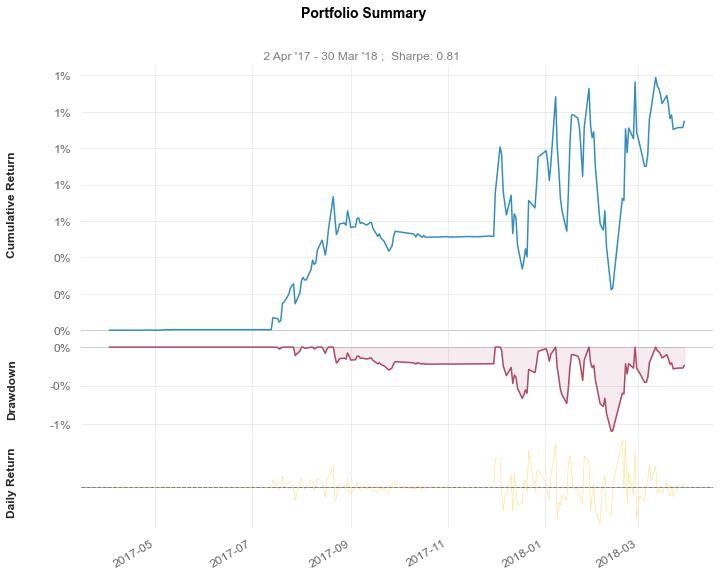

In [1845]:
import quantstats as qs
qs.reports.metrics(port_return, mode = 'basic')
qs.plots.snapshot(port_return)

---
# 전략4

## 1) 전략4 함수 : 일별수익률로 return

In [1846]:
def func_strategy4(df_func):
    
    # 1.컬럼 생성
    df_func["BS"] = ""
    df_func["보유날_종가"] = 0
    df_func["보유날_일별수익률"] = 0
    df_func["첫매수날_여부"] = 0 # 첫매수날의 일별수익율은 0이다. 일별수익률 컬럼만들어준 뒤 이거 사용해서 다시 전처리
    df_func
    
    # 2. BS 컬럼
    ## BS컬럼 생성을 위해 임의의 2개 행 만들기
    df_tm2 = pd.DataFrame(df_func.iloc[0]).T
    df_tm2["날짜"]=(df_func.index[0] - timedelta(days=2))
    df_tm2["BS"] = "sell" 
    df_tm2.set_index("날짜", inplace=True)
    df_tm2

    df_tm1 = pd.DataFrame(df_func.iloc[0]).T
    df_tm1["날짜"]=(df_func.index[0] - timedelta(days=1))
    df_tm1["BS"] = "sell"
    df_tm1.set_index("날짜", inplace=True)
    df_tm1

    df_func = pd.concat([df_tm2, df_tm1, df_func], axis=0)
    df_func.reset_index(drop=False, inplace=True)
    df_func
    
    ## BS컬럼에 buy&sell 넣기
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
    
        if df_func.loc[i-1, "BS"] == "sell": # (전날에 sell이면) buy조건 만족하는지 확인
            if (df_func.loc[i-2, "BS"] == "buy")&(df_func.loc[i-1, "BS"] == "sell")&((df_func.loc[i, "MACD"] >= df_func.loc[i, "MACD_signal"])&(df_func.loc[i, "close"] >= df_func.loc[i, "MA60"])):
                df_func.loc[i-1, "BS"] = "buy"
                df_func.loc[i, "첫매수날_여부"] = 1
            
            if ((df_func.loc[i, "MACD"] >= df_func.loc[i, "MACD_signal"])&(df_func.loc[i, "close"] >= df_func.loc[i, "MA60"])):
                df_func.loc[i, "BS"] = "buy"
            else:
                df_func.loc[i, "BS"] = "sell"
        
        else: # (전날이 "buy"일 때) sell조건
            if ((df_func.loc[i, "MACD"] <= df_func.loc[i, "MACD_signal"])&(df_func.loc[i, "close"] <= df_func.loc[i, "MA20"])): # 매도사인
                df_func.loc[i, "BS"] = "sell"
            else:
                df_func.loc[i, "BS"] = "buy" # sell조건 만족 안하면 "buy"
    
    # 3. "보유날_종가"
    for i in df_func.index:
        if df_func.loc[i, "BS"] == "buy":
            df_func.loc[i, "보유날_종가"] = df_func.loc[i, "close"]
    
    # 4. "보유날_일별수익률" 컬럼
    df_func["보유날_일별수익률"] = df_func["보유날_종가"].pct_change()
    df_func["보유날_일별수익률"] = df_func["보유날_일별수익률"].fillna(0)
    for i in df_func.index:
        if df_func.loc[i, "보유날_일별수익률"] == -1.0:
            df_func.loc[i, "보유날_일별수익률"] = 0
        if df_func.loc[i, "보유날_일별수익률"] == np.inf:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    # 5. "첫매수날_여부" 컬럼
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
        
        if (df_func.loc[i-1, "BS"] == "sell")&(df_func.loc[i, "BS"] == "buy"):
            df_func.loc[i, "첫매수날_여부"] = 1
    
    for i in df_func.index:
        if df_func.loc[i, "첫매수날_여부"] == 1:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    df_func.drop(index=[0,1],inplace=True)
    df_func.reset_index(drop=True, inplace=True)
    df_stock = df_func.set_index("날짜")["보유날_일별수익률"]
    
    return df_stock


## 2) 포트폴리오 일별 수익률 계산

In [1847]:
df_port = df_2012.copy()

### 1. 동등비중

In [1848]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = func_strategy4(df_acompany)
#     port_return += df_stock
# port_return = port_return/len(list_company_code)

### 2. 수익률 높게

In [1849]:
list_company_code = list(df_port["거래소코드"].unique())

port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
for i in list_company_code:
    df_acompany = df_port[df_port["거래소코드"]==i]
    df_stock = func_strategy4(df_acompany)
    port_return += df_stock * dict_weight_max[i] # 리스크가 같을 때 수익률 젤 높게하는 비중으로 가중평균
port_return = port_return/len(list_company_code)

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/865391820.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_func["BS"] = ""
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/865391820.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_func["보유날_종가"] = 0
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/865391820.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

### 3. 리스크 낮게

In [1850]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = func_strategy4(df_acompany)
#     port_return += df_stock * dict_weight_min[i] # 수익률이 같을 때 리스크를 낮게하는 비중으로 가중평균
# port_return = port_return/len(list_company_code)

## 3) 포트폴리오 평가

                    Strategy
------------------  ----------
Start Period        2017-04-03
End Period          2018-03-30
Risk-Free Rate      0.0%
Time in Market      85.0%

Cumulative Return   3.66%
CAGR﹪              3.7%

Sharpe              0.98
Prob. Sharpe Ratio  83.59%
Sortino             1.54
Sortino/√2          1.09
Omega               1.22

Max Drawdown        -1.51%
Longest DD Days     162

Gain/Pain Ratio     0.22
Gain/Pain (1M)      1.5

Payoff Ratio        1.03
Profit Factor       1.22
Common Sense Ratio  1.14
CPC Index           0.68
Tail Ratio          0.93
Outlier Win Ratio   5.24
Outlier Loss Ratio  3.37

MTD                 -0.04%
3M                  0.45%
6M                  2.53%
YTD                 0.45%
1Y                  3.66%
3Y (ann.)           3.7%
5Y (ann.)           3.7%
10Y (ann.)          3.7%
All-time (ann.)     3.7%

Avg. Drawdown       -0.79%
Avg. Drawdown Days  37
Recovery Factor     2.42
Ulcer Index         0.01
Serenity Index      0.96


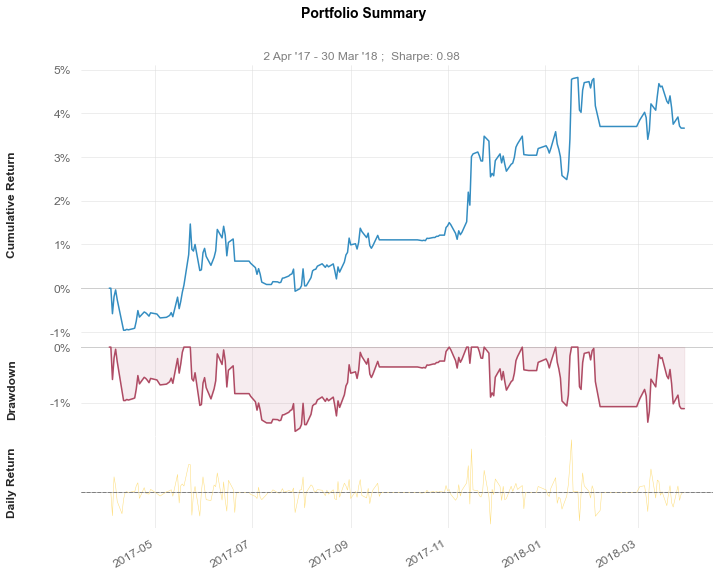

In [1851]:
import quantstats as qs
qs.reports.metrics(port_return, mode = 'basic')
qs.plots.snapshot(port_return)

---
# 전략5

## 1) 전략5 함수 : 일별수익률로 return

In [1852]:
def func_strategy5(df_func):
    
    # 1.컬럼 생성
    df_func["BS"] = ""
    df_func["보유날_종가"] = 0
    df_func["보유날_일별수익률"] = 0
    df_func["첫매수날_여부"] = 0 # 첫매수날의 일별수익율은 0이다. 일별수익률 컬럼만들어준 뒤 이거 사용해서 다시 전처리
    df_func
    
    # 2. BS 컬럼
    ## BS컬럼 생성을 위해 임의의 2개 행 만들기
    df_tm2 = pd.DataFrame(df_func.iloc[0]).T
    df_tm2["날짜"]=(df_func.index[0] - timedelta(days=2))
    df_tm2["BS"] = "sell" 
    df_tm2.set_index("날짜", inplace=True)
    df_tm2

    df_tm1 = pd.DataFrame(df_func.iloc[0]).T
    df_tm1["날짜"]=(df_func.index[0] - timedelta(days=1))
    df_tm1["BS"] = "sell"
    df_tm1.set_index("날짜", inplace=True)
    df_tm1

    df_func = pd.concat([df_tm2, df_tm1, df_func], axis=0)
    df_func.reset_index(drop=False, inplace=True)
    df_func
    
    ## BS컬럼에 buy&sell 넣기
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
    
        if df_func.loc[i-1, "BS"] == "sell": # (전날에 sell이면) buy조건 만족하는지 확인
            if (df_func.loc[i-2, "BS"] == "buy")&(df_func.loc[i-1, "BS"] == "sell")&((df_func.loc[i, "close"] >= df_func.loc[i, "MA60"])&(df_func.loc[i, "close"] >= df_func.loc[i, "MA9"])&(df_func.loc[i, "close"] >= df_func.loc[i, "MA20"])):
                df_func.loc[i-1, "BS"] = "buy"
                df_func.loc[i, "첫매수날_여부"] = 1
            
            if ((df_func.loc[i, "close"] >= df_func.loc[i, "MA60"])&(df_func.loc[i, "close"] >= df_func.loc[i, "MA9"])&(df_func.loc[i, "close"] >= df_func.loc[i, "MA20"])): # 매수사인(위 if문에도 넣기)
                df_func.loc[i, "BS"] = "buy"
            else:
                df_func.loc[i, "BS"] = "sell"
        
        else: # (전날이 "buy"일 때) sell조건
            if (df_func.loc[i, "close"] <= df_func.loc[i, "MA40"]): # 매도사인
                df_func.loc[i, "BS"] = "sell"
            else:
                df_func.loc[i, "BS"] = "buy" # sell조건 만족 안하면 "buy"
    
    # 3. "보유날_종가"
    for i in df_func.index:
        if df_func.loc[i, "BS"] == "buy":
            df_func.loc[i, "보유날_종가"] = df_func.loc[i, "close"]
    
    # 4. "보유날_일별수익률" 컬럼
    df_func["보유날_일별수익률"] = df_func["보유날_종가"].pct_change()
    df_func["보유날_일별수익률"] = df_func["보유날_일별수익률"].fillna(0)
    for i in df_func.index:
        if df_func.loc[i, "보유날_일별수익률"] == -1.0:
            df_func.loc[i, "보유날_일별수익률"] = 0
        if df_func.loc[i, "보유날_일별수익률"] == np.inf:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    # 5. "첫매수날_여부" 컬럼
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
        
        if (df_func.loc[i-1, "BS"] == "sell")&(df_func.loc[i, "BS"] == "buy"):
            df_func.loc[i, "첫매수날_여부"] = 1
    
    for i in df_func.index:
        if df_func.loc[i, "첫매수날_여부"] == 1:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    df_func.drop(index=[0,1],inplace=True)
    df_func.reset_index(drop=True, inplace=True)
    df_stock = df_func.set_index("날짜")["보유날_일별수익률"]
    
    return df_stock


## 2) 포트폴리오 일별 수익률 계산

In [1853]:
df_port = df_2012.copy()

### 1. 동등비중

In [1854]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = func_strategy5(df_acompany)
#     port_return += df_stock
# port_return = port_return/len(list_company_code)

### 2. 수익률 높게

In [1855]:
list_company_code = list(df_port["거래소코드"].unique())

port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
for i in list_company_code:
    df_acompany = df_port[df_port["거래소코드"]==i]
    df_stock = func_strategy5(df_acompany)
    port_return += df_stock * dict_weight_max[i] # 리스크가 같을 때 수익률 젤 높게하는 비중으로 가중평균
port_return = port_return/len(list_company_code)

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/2076393599.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_func["BS"] = ""
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/2076393599.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_func["보유날_종가"] = 0
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_14978/2076393599.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

### 3. 리스크 낮게

In [1856]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = func_strategy5(df_acompany)
#     port_return += df_stock * dict_weight_min[i] # 수익률이 같을 때 리스크를 낮게하는 비중으로 가중평균
# port_return = port_return/len(list_company_code)

## 3) 포트폴리오 평가

                    Strategy
------------------  ----------
Start Period        2017-04-03
End Period          2018-03-30
Risk-Free Rate      0.0%
Time in Market      95.0%

Cumulative Return   5.01%
CAGR﹪              5.07%

Sharpe              1.32
Prob. Sharpe Ratio  90.91%
Sortino             2.16
Sortino/√2          1.52
Omega               1.31

Max Drawdown        -1.47%
Longest DD Days     67

Gain/Pain Ratio     0.31
Gain/Pain (1M)      2.1

Payoff Ratio        1.0
Profit Factor       1.31
Common Sense Ratio  1.31
CPC Index           0.74
Tail Ratio          1.0
Outlier Win Ratio   5.24
Outlier Loss Ratio  3.62

MTD                 0.04%
3M                  0.4%
6M                  1.68%
YTD                 0.4%
1Y                  5.01%
3Y (ann.)           5.07%
5Y (ann.)           5.07%
10Y (ann.)          5.07%
All-time (ann.)     5.07%

Avg. Drawdown       -0.58%
Avg. Drawdown Days  22
Recovery Factor     3.4
Ulcer Index         0.01
Serenity Index      1.49


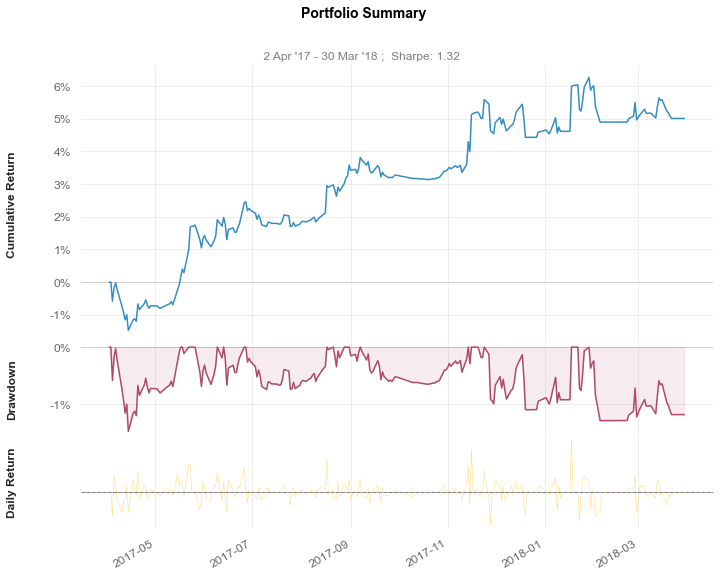

In [1857]:
import quantstats as qs
qs.reports.metrics(port_return, mode = 'basic')
qs.plots.snapshot(port_return)